In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
% matplotlib inline

In [42]:
# y = x^3-5
x = np.linspace(1,800,50)
y = -x**3 + 500*x**2 - 5

xmean = x.mean()
xstd = x.std()
# print(xmean,xstd)

ymean = y.mean()
ystd = y.std()
# print(ymean,ystd)

x = x.reshape((-1,1))
y = y.reshape((-1,1))

In [43]:
def layer(inputs, input_dim, output_dim, activate = None):
    W = tf.Variable(tf.truncated_normal([input_dim,output_dim],stddev = 0.1))
    b = tf.Variable(tf.zeros([output_dim]))
    XWB = tf.matmul(inputs,W) + b
    if activate == None:
        outputs = XWB
    else:
        outputs = activate(XWB)
    return outputs

In [44]:
learning_rate = 0.01
epochs = 50000
show_loss = 5000

X = tf.placeholder(tf.float32, shape=(None,1), name='X')
Y = tf.placeholder(tf.float32, shape=(None,1), name='Y')
h1 = layer(inputs=(X-xmean)/xstd , input_dim=1, output_dim=3, activate=tf.nn.tanh)
# h2 = layer(inputs=h1, input_dim=3, output_dim=3, activate=tf.nn.tanh)
h3 = layer(inputs=h1, input_dim=3, output_dim=2, activate=tf.nn.relu)
forward = layer(inputs=h3, input_dim=2, output_dim=1)
pred = forward * ystd + ymean
loss_func = tf.reduce_mean(tf.square(forward-(Y-ymean)/ystd))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_func)
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

i = 1.0

[0.99976885]
[0.00014781242]
[2.5171188e-05]
[2.0835818e-05]
[1.7401331e-05]
[5.83378e-05]
[1.2169627e-05]
[1.5920657e-05]
[1.0829215e-05]
[1.7094682e-05]


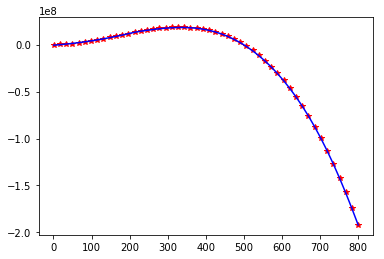

Time = 59.00367331504822


In [45]:
startTime = time()
for epoch in range(epochs):
    sess.run(optimizer, feed_dict = {X:x, Y:y})
    loss = sess.run([loss_func],feed_dict = {X:x,Y:y})
    if epoch % show_loss == 0:
        print(loss)
Y_p = sess.run(pred,feed_dict={X:x})
plt.plot(x,y,'r*')
plt.plot(x,Y_p,'b-')
plt.show()
print("Time =",time()-startTime)

In [18]:
print(sess.run(pred, feed_dict={X:[[900],[430]]}))
print(-900**3 + 500*900**2 - 5,-430**3 + 500*430**2 - 5)

[[-3.0743779e+08]
 [ 1.0801602e+07]]
-324000005 12942995
